K-Nearest Neighbours (KNN) Algorithm (Completed July, 2018):

The following code will apply my KNN algorithm on the IRIS dataset. This is my first classification algorithm from scratch. Once executed, I will then crosscheck my accuracy using the KNN algorithm available from the sklearn module.

Key achievements from this project:
1. Created the KNN algorithm from scratch using euclidean distance
2. Applied PCA to a dataset and then graphically represented this data in a 2D space.
3. Crosschecked my results using sklearn's KNN module.


In [2]:
#import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [10]:
#functions required for KNN

#function for calculating distance. Change this function if a different 
#distance measure is to be used.

def getdistance(train_set, test_row):
    distance_table = np.sqrt((train_set - test_row)**2).sum(axis=1)
    distance_indexes = distance_table.index
    distance_order = np.argsort(distance_table)
    return distance_order, distance_indexes

#once distance is calculated, get the corresponding labels and knn result
#this assumes that each "label" regardless of order, is given the same weight
#a weighted ordering calculation can be implemented here, but is outside my
#scope at this stage.
def getlabels(distance_order, distance_indexes, train_labels, k, possible_labels):
    keep_running = 1
    while keep_running == 1:
        counter = np.zeros(len(possible_labels))
        for i in range(0,k):
            label = train_labels.iloc[distance_order.iloc[i],0] #Y_train
            index = possible_labels.index(label)
            counter[index] += 1
            counted = np.sort(counter)[::-1] #sort in descending order
        if counted[0] == counted[1]: #no unique label
            k = k - 1
        else:
            count_sort = np.argsort(counter)
            winner = count_sort[-1]
            result = possible_labels[winner]
            keep_running = 0
    return result        

#knn function
def run_knn(X_train, Y_train, X_test, k):    
    predictions = []
    X_train_pd = pd.DataFrame(X_train)
    possible_labels = list(set(Y_train[0]))
    for i in range(0,len(X_test)):
        test_row = X_test.iloc[i,:]
        #test_row = X_test[i] lets stay with pandas
        distance_order, distance_indexes = getdistance(X_train_pd, test_row)
        result = getlabels(distance_order, distance_indexes, Y_train, k, possible_labels)
        predictions.append(result)
    predictions = pd.DataFrame(predictions)
    return predictions


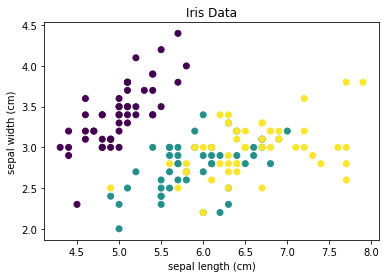

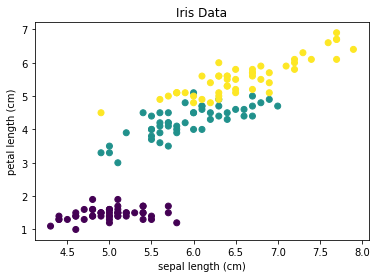

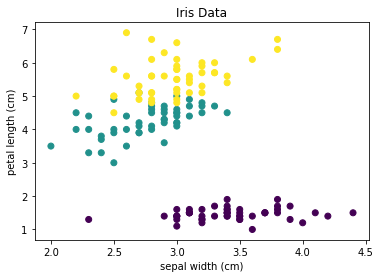

In [7]:
#visually explore IRIS

#load iris dataset
iris = datasets.load_iris()

#put into dataframes
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
labels = pd.DataFrame(iris.target)

###visually explore the data
plt.scatter(iris_data.iloc[:,0], iris_data.iloc[:,1], c = labels.iloc[:,0])
plt.title('Iris Data')
plt.xlabel(iris_data.columns[0])
plt.ylabel(iris_data.columns[1])
plt.show()

plt.scatter(iris_data.iloc[:,0], iris_data.iloc[:,2], c = labels.iloc[:,0])
plt.title('Iris Data')
plt.xlabel(iris_data.columns[0])
plt.ylabel(iris_data.columns[2])
plt.show()

plt.scatter(iris_data.iloc[:,1], iris_data.iloc[:,2], c = labels.iloc[:,0])
plt.title('Iris Data')
plt.xlabel(iris_data.columns[1])
plt.ylabel(iris_data.columns[2])
plt.show()

[0.72770452 0.23030523 0.03683832 0.00515193]


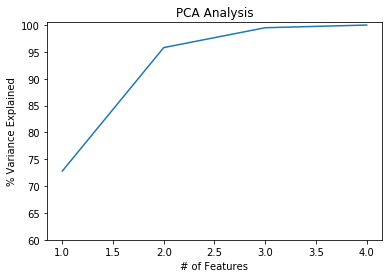

From the graph above, factorising the features into two variables explains approximately 95% of the variance i.e. explains 95% of the data.


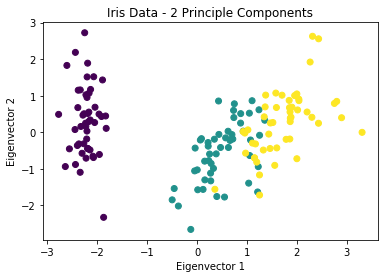

In [33]:
#plot IRIS using PCA for a more complete picture

#To visualise the data more completely, apply PCA and graph the first two eigenvectors

from sklearn.preprocessing import StandardScaler
norm_iris_data = StandardScaler().fit_transform(iris_data)

n = iris_data.shape[1]
pca = PCA(n_components = n)
principal_components = pca.fit_transform(norm_iris_data)
df_principal_components = pd.DataFrame(principal_components)
print(pca.explained_variance_ratio_) #eigenvalues
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

#plot the variance explained for each eigenvector
plt.plot(range(1, n+1), var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(60,100.5)
plt.style.context('seaborn-whitegrid')
plt.show()

print('From the graph above, factorising the features into two variables explains approximately 95% of the variance i.e. explains 95% of the data.')

#lets plot the first two eigenvectors
plt.scatter(df_principal_components[0], df_principal_components[1], c = labels.iloc[:,0])
plt.title('Iris Data - 2 Principle Components')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.show()

In [36]:
#apply knn from scratch

#train and test split
X_train, X_test, y_train, y_test = train_test_split(iris_data, labels, test_size=0.3)#, random_state=24)

#apply model after using train test split

predictions = run_knn(X_train, y_train, X_test, 3)
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Predictions from scratch knn classifier:")
print(conf_matrix)
print("\nAccuracy: " + str(accuracy))

Predictions from scratch knn classifier:
[[16  0  0]
 [ 0 14  1]
 [ 0  0 14]]

Accuracy: 0.9777777777777777


In [37]:
#now measure against scikitlearn's knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
y_train_1 = np.ravel(y_train)
knn.fit(X_train, y_train_1) 
KNeighborsClassifier(algorithm='brute', n_neighbors=3, p=2,#selects euclidean distance
                     weights='uniform') #unweighted ordering. 'distance' uses the
#inverse of each distance i.e. closest gets a weighting of 1, second gets 1/2 etc.
knn_predictions = knn.predict(X_test)
conf_matrix_scikitlearn = confusion_matrix(y_test, knn_predictions)
accuracy_scikitlearn = accuracy_score(y_test, predictions)
print("Predictions from sklearn's knn classifier:")
print(conf_matrix_scikitlearn)
print(accuracy_scikitlearn)

Predictions from sklearn's knn classifier:
[[16  0  0]
 [ 0 14  1]
 [ 0  0 14]]
0.9777777777777777


The KNN results I obtain from my code are (although not exactly the same) highly aligned to the scikitlearn algorithm. Given that both algorithms are actually not exactly the same, the high correlation between the resultant confusion matrices is sufficient to conclude that my algorithm is working properly. Onto the next exercise!